In [19]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib.mlab import griddata

In [5]:
df = pd.read_csv('C:/Users/visha/Desktop/Datasets/proj.csv', header = 0, index_col = None, sep = None)

C:\Users\Visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.



In [6]:
df.head()

,Depth,Compressive strength,Young Modulus
0,10.820,65.93,9.50
1,16.190,77.29,8.78
2,20.370,84.61,10.15
3,38.585,67.39,12.25
4,57.440,77.53,9.49


In [7]:
x = df.describe()

In [8]:
x

,Depth,Compressive strength,Young Modulus
count,114.000000,114.000000,114.000000
mean,225.112675,56.549649,10.730965
std,96.679640,17.811782,2.940776
min,10.820000,19.740000,2.500000
25%,159.135000,43.200000,8.897500
50%,242.465000,56.455000,10.430000
75%,295.300000,69.695000,11.720000
max,424.420000,99.380000,19.150000


In [11]:
df[df['Young Modulus'] == df['Young Modulus'].max()][['Depth', 'Compressive strength']]

,Depth,Compressive strength
21,126.45,89.73


In [12]:
df[df['Young Modulus'] == df['Young Modulus'].min()][['Depth', 'Compressive strength']]

,Depth,Compressive strength
74,271.73,19.74


In [13]:
df[df['Young Modulus'] > df['Compressive strength']]

,Depth,Compressive strength,Young Modulus


In [14]:
df['Young Modulus'].value_counts()

16.82    2
10.65    2
9.01     2
13.63    2
9.77     2
10.69    2
9.08     1
10.47    1
8.57     1
11.53    1
8.64     1
11.69    1
10.39    1
7.31     1
6.42     1
10.78    1
13.83    1
9.34     1
9.92     1
9.50     1
8.42     1
8.81     1
10.15    1
7.57     1
10.74    1
14.00    1
11.20    1
6.83     1
12.84    1
9.53     1
        ..
12.91    1
15.37    1
11.38    1
9.52     1
10.53    1
10.31    1
10.27    1
9.10     1
9.62     1
10.11    1
7.10     1
11.73    1
14.36    1
15.66    1
8.29     1
8.82     1
11.23    1
16.31    1
12.34    1
8.44     1
9.42     1
6.32     1
9.20     1
9.49     1
17.91    1
10.86    1
11.11    1
10.20    1
7.35     1
15.18    1
Name: Young Modulus, dtype: int64

In [32]:
#assert len(Z) == (len(X) * len(Y)) 
x = df.Depth.iloc[1:]
y = df['Compressive strength'].iloc[1:]
z = df['Young Modulus'].iloc[1:]
X = np.array(x)
Y = np.array(y)
Z = np.array(z)

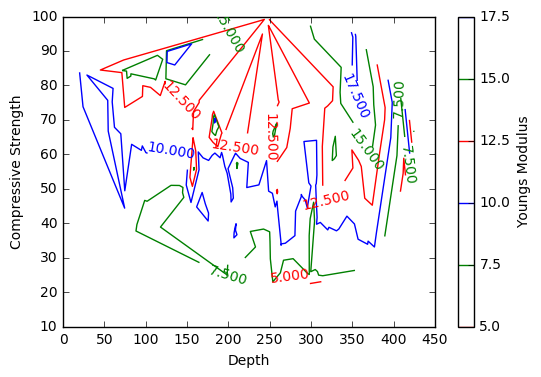

In [33]:
cs = plt.tricontour(X, Y, np.transpose(Z), colors = ['r', 'g', 'b'], linestyle = 'dashed', rightside_up = 1, align = 'edge')
plt.xlabel('Depth')
plt.ylabel('Compressive Strength')
plt.clabel(cs, inline = True)
cb = plt.colorbar(cs)
cb.set_label('Youngs Modulus')
plt.show()
#plt.zlabel('Youngs Modulus')

C:\Users\Visha\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning:

In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.

C:\Users\Visha\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning:

In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.



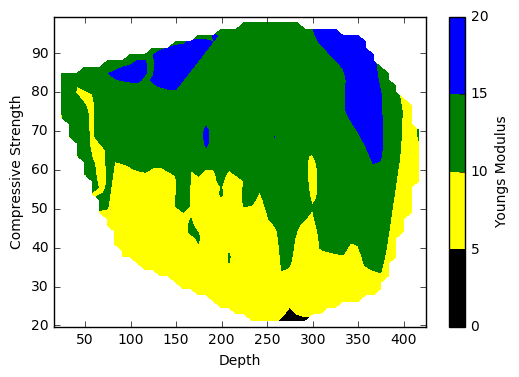

In [69]:
xi = np.linspace(np.min(X, axis = 0), np.max(X, axis = 0))
yi = np.linspace(np.min(Y, axis = 0), np.max(Y, axis = 0))
zi = griddata(X, Y, np.transpose(Z, axes = 0), xi, yi, interp = 'linear')
#levels = [2, , 14, 20]
cs = plt.contourf(xi, yi, zi, 3, colors = ['black', 'yellow', 'g', 'b'])
cb = plt.colorbar(cs)
plt.xlabel('Depth')
plt.ylabel('Compressive Strength')
cb.set_label('Youngs Modulus')
plt.show()

In [ ]:
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, X**2 + Y**2, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');